# Class test 2 (worth 20% of your final grade)

To complete this test you must have your attendance verified by a tutor in the lab.  Before the close of the lab you must submit your jupyter notebook to Canvas.  The portal will close at 5pm.

If you have an Academic Plan which allows you to take more time to complete the test then you will need to email your notebook to the lecturer (tristram.alexander@sydney.edu.au) by the close of the exam.

This test is to be taken under open book conditions.  This means you can work on your own computer, or the lab computer, and access all material you have locally, and all material available on Canvas.  If you have material stored in the cloud, such as on Google Drive, then you may access this also.  You may also access the Python help, and viewing the help through the browser (for instance by clicking the sub-links in the Help link above) is acceptable.  You cannot use email, browse the internet or forums, or use Google search while you are taking the test.

Please read the questions carefully, and answer all parts.  Each part is worth 2 marks, for a total of 20 marks.  Note that while each question is equally weighted they are not necessarily equal in the amount of time required to complete them.  For instance, question 3 requires significantly more code than the earlier questions.

Question 2c is to be completed by COSC2002 students, Question 2d is to be completed by COSC2902 students.  Both COSC2002 and COSC2902 students should complete Questions 2a and 2b.

Do not discuss this test, or share any information about the test, with students in the other stream.


## Question 1

The 'game of life' is a famous cellular automaton that runs on a 2D grid.  Each cell in the grid has two states, alive or dead, and 8 neighbours, north, south, east, west, and the four diagonals. 

In the Game of Life, the next state of each cell depends on its current state and its number of live
neighbours. If a cell is alive, it stays alive if it has 2 or 3 neighbours, otherwise it dies.  If a cell is dead, it stays dead unless it has exactly 3 neighbours.

We can simulate this problem using the `scipy.signal` function `correlate2d`.  To do so in an easy way we should ensure that all our cell values are unsigned 8-bit integers.  This can be done during array creation by passing in the following option `dtype=np.uint8` to the NumPy array creation functions.

### 1a)

Set up an array with 11 rows and 11 columns, where all elements are zero, except for the following: all diagonal elements are value 1; all elements in the sixth row are 1.  Display the array graphically below.


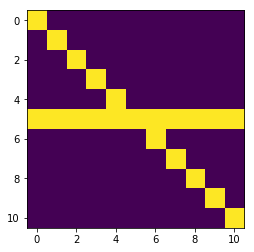

In [25]:
import numpy as np
import matplotlib.pyplot as plt
a = np.zeros((11,11),dtype=np.uint8)
a[5,:]=np.ones(11,dtype=np.uint8)
a = a+np.diag(np.ones(11,dtype=np.uint8))
a[a>1] = 1
plt.imshow(a)
plt.show()


### 1b) 

Determine the correlation between the matrix in 1a) and the following kernel: `kernel = [[1,1,1],[1,10,1],[1,1,1]]`.  Print out the resulting correlation matrix.


In [27]:
from scipy.signal import correlate2d
kernel = np.array([[1, 1, 1],
[1,10, 1],
[1, 1, 1]])
c = correlate2d(a, kernel, mode='same')
print(c)


[[11  2  1  0  0  0  0  0  0  0  0]
 [ 2 12  2  1  0  0  0  0  0  0  0]
 [ 1  2 12  2  1  0  0  0  0  0  0]
 [ 0  1  2 12  2  1  0  0  0  0  0]
 [ 2  3  4  5 14  4  3  3  3  3  2]
 [11 12 12 13 13 14 13 13 12 12 11]
 [ 2  3  3  3  3  4 14  5  4  3  2]
 [ 0  0  0  0  0  1  2 12  2  1  0]
 [ 0  0  0  0  0  0  1  2 12  2  1]
 [ 0  0  0  0  0  0  0  1  2 12  2]
 [ 0  0  0  0  0  0  0  0  1  2 11]]


### 1c)

Show how the kernel given above may be used to implement the rules for the game of life, i.e. show the lines of code required to implement one step of the game of life given a start matrix `a` and the kernel defined in 1b)


In [ ]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
a = table[c]


### 1d) 

Display the output graphically after 100 iterations.

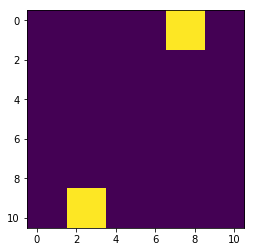

In [29]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
a = np.zeros((11,11),dtype=np.uint8)
a[5,:]=np.ones(11,dtype=np.uint8)
a = a+np.diag(np.ones(11,dtype=np.uint8))
a[a>1] = 1
for i in range(100):
    c = correlate2d(a, kernel, mode='same')
    a = table[c]
#print(c)
plt.imshow(a)
plt.show()


# Question 2

The following equation describes the angle $\theta$ of a mass attached to a rigid pole of length $l$ fixed at a central pivot point, but free to rotate about this point, i.e. a pendulum:

$ \frac{d^2 \theta}{dt^2} + \gamma \frac{d\theta}{dt} + \frac{g}{l}\sin\theta = f\cos(\omega t).$

The pendulum mass is subjected to a periodic force $f$ (achieved for instance by twisting the pivot point first one way and then the other), with frequency $\omega$.  The parameter $g$ is the acceleration due to gravity and $\gamma$ is the velocity dependent damping of the motion, due to friction.  Take $g = 10$, $l = 1$, $\gamma = 0.1$, $f = 1$ and $\omega = 1$. 

## 2a)

Provide a function `derivs` which returns the derivatives of the dependent variables, given values of the dependent variables and the current time.

In [22]:
import numpy as np
def derivs(Y,t):
    coeff = 10
    f = 1
    gamma = 0.1
    theta = Y[0]
    theta_dot = Y[1]
    return [theta_dot, -gamma*theta_dot-coeff*np.sin(theta)+f*np.cos(t)]

## 2b)

Integrate the system of equations from $t = 0$ to $t = 100$, given the following initial conditions $x(0) = 0$, $y(0) = 0$.  Display the output on  a single set of axes.  Display $x(t)$ with a solid line, $y(t)$ with a dashed line.  If possible, identify the nature of the dynamics.

In [30]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
y0 = [0,0]
tspan = np.linspace(0,100,1001)
output = odeint(derivs,y0,tspan)


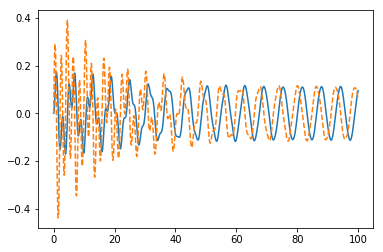

In [31]:
plt.plot(tspan,output[:,0],tspan,output[:,1],'--')
plt.show()

Dynamics converge to a periodic solution, looks to be of period of forcing.

## 2c) **COSC2002 ONLY**

Let the simulation run for long enough to remove transients from the dynamics and then display the output of your simulation on the plane $[\theta, \frac{d\theta}{dt}]$.

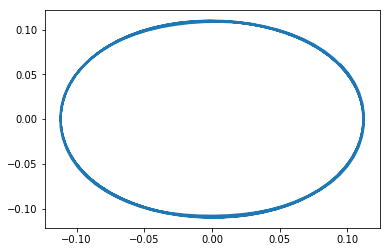

In [32]:
y0 = [output[-1,0],output[-1,1]]
tspan = np.linspace(100,200,1001)
output_final = odeint(derivs,y0,tspan)
plt.plot(output_final[:,0],output_final[:,1])
plt.show()

## 2d) **COSC2902 ONLY**

Investigate the dependence of the dynamics on parameters.  Let the simulation run long enough to remove initial transients and record the maximum value of $\theta$ as you vary $\omega$.  Plot the maximum value of $\theta$ versus $\omega$ for $\omega \in [1,5]$.  What do your results suggest about the dependence on $\omega$?

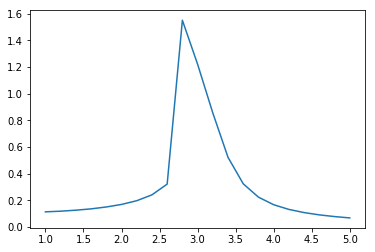

In [34]:
import numpy as np
def derivs(Y,t,omega):
    coeff = 10
    f = 1
    gamma = 0.1
    theta = Y[0]
    theta_dot = Y[1]
    return [theta_dot, -gamma*theta_dot-coeff*np.sin(theta)+f*np.cos(omega*t)]
def get_val(omega):
    y0 = [0,0]
    tspan = np.linspace(0,200,2001)
    midpoint = len(tspan)//2
    output = odeint(lambda y,t: derivs(y, t, omega),y0,tspan)
    return max(output[midpoint:-1,0])

omega_vals = np.linspace(1,5,21)
amp_vals = np.zeros(len(omega_vals))
i=0
for omega in omega_vals:
    amp_vals[i] = get_val(omega)
    i+=1
plt.plot(omega_vals,amp_vals)
plt.show()


There is a small range of $omega$ which leads to a much larger amplitude in the pendulum (in fact, this is due to resonance between the driving frequency and the natural frequency of the pendulum).

## Question 3

Ecologists have been concerned that the population of Christmas beetles is in decline.  To determine Christmas beetle densities a team decides to conduct an experiment at night.  They set up a bright light far from other light sources.  They put the light on a pole so that it is visible from far away in all directions.  Christmas beetles are attracted to the bright light and fly in a straight line towards it.  The ecologists wish to use the arrival time data of the Christmas beetles to determine their average population density in the environment.  As a part of the team you are charged with simulating the expected response.


### 3a)

Set up a `Beetle` class with the following attributes: 

1. `v` (the speed a beetle flies);
2. `xtarget` and `ytarget` (the location of the light);
3. `dist` (the distance between the beetle and the target);
4. `time` (the time since the light was turned on);
5. `arrival_time` (the time at which the beetle reaches the light).

On initialisation, a beetle should be given values for xtarget, ytarget, and initial coordinates x and y.  Set `v = 1` for all beetles.

Include the following methods in the class:
1. An `__init__` method, which accepts as inputs values for `xtarget` (default, 0) and `ytarget` (default, 0) and values for the beetle location `x` and `y`, calculates the distance to the light, and sets `time` to be zero.
2. A `move` method, which takes as input the time step `deltat`, updates the time since the light turned on, and moves the beetle a distance `v deltat` closer to the light, if it hasn't yet reached the light.  The beetle should move in a straight line towards the light.  If for the first time it is within distance `v deltat` of the light at the start of the time step then its distance to the light is set to zero, and the arrival time is recorded. 
3. A `get_time` method which returns the arrival time of the beetle.  Note, you should decide what to do if the beetle hasn't yet reached the light (perhaps return a negative value for arrival time?).


In [35]:
import numpy as np
import matplotlib.pyplot as plt

class Beetle:
    speed = 1
    
    def __init__(self,xtarget,ytarget,xloc,yloc):
        self.time = 0
        self.arrival_time = -1
        self.moving = 1
        self.x = xloc
        self.y = yloc
        self.xtarget = xtarget
        self.ytarget = ytarget
        self.dist = np.sqrt((self.x-self.xtarget)**2+(self.y-self.ytarget)**2)
        
    def move(self,deltat):
        step = self.speed*deltat
        self.time += step
        if self.dist > step:
            self.dist -= step
        else:
            if self.moving:
                self.dist = 0
                self.moving = 0
                self.arrival_time = self.time
                
    def get_time(self):
        return self.arrival_time



## 3b) 

Set up a `World` class with the following attributes:
1. `xworld` and `yworld` (where the world has dimensions [-xworld,xworld], [-yworld, yworld]);
2. `xtarget` and `ytarget` (the x and y coordinates of the light);
3. `num_beetles` (the total number of beetles in the world);
4. All the beetles in the world, as a list of objects;
5. `deltat` (the time step for the dynamics)

Include the following methods in the class:
1. An `__init__` method, which accepts as input values for `xworld` (default, 10), `yworld` (default, 10), `xtarget` (default, 0), `ytarget` (default, 0), `num_beetles` (default, 50), `deltat` (default, 0.01).  The method should set up all the beetle objects and assign them random coordinates from within the range [-xworld,xworld], [-yworld,yworld];
2. A `step` method which calls each beetle's move method with the parameter `deltat`;
3. A `get_arrival_times` method which returns all the arrival times for beetles which have arrived at the light.




In [36]:
class World:
    
    def __init__(self,xworld = 10,yworld = 10,xtarget = 0, ytarget = 0,num_beetles = 50,deltat = 0.01):
        self.xworld = xworld
        self.yworld = yworld
        xlocs = np.random.uniform(-xworld,xworld,num_beetles)
        ylocs = np.random.uniform(-yworld,yworld,num_beetles)
        self.xtarget = xtarget
        self.ytarget = ytarget
        self.deltat = deltat
        self.num_beetles = num_beetles
        self.beetles = [Beetle(xtarget,ytarget,xlocs[i],ylocs[i]) for i in range(num_beetles)]
        
    def step(self):
        for beetle in self.beetles:
            beetle.move(self.deltat)
            
    def get_arrival_times(self):
        arrival_times = np.zeros(len(self.beetles))
        i = 0
        for beetle in self.beetles:
            arrival_times[i] = beetle.get_time()
            i+=1
        return arrival_times[arrival_times>0]


In [ ]:
    def __init__(self,xworld = 10,yworld = 10,xtarget = 0, ytarget = 0,num_beetles = 50,deltat = 0.01):
        self.xworld = xworld
        self.yworld = yworld
        xlocs = np.random.uniform(-xworld,xworld,num_beetles)
        ylocs = np.random.uniform(-yworld,yworld,num_beetles)
        self.xtarget = xtarget
        self.ytarget = ytarget
        self.deltat = deltat
        self.num_beetles = num_beetles
        self.beetles = [Beetle(xtarget,ytarget,xlocs[i],ylocs[i]) for i in range(num_beetles)]
        
    def step(self):
        for beetle in self.beetles:
            beetle.move(self.deltat)
            
    def get_arrival_times(self):
        arrival_times = np.zeros(len(self.beetles))
        i = 0
        for beetle in self.beetles:
            arrival_times[i] = beetle.get_time()
            i+=1
        return arrival_times[arrival_times>0]


## 3c)

Run the simulation for long enough such that all the beetles reach the light and create a histogram of arrival times.  Provide some advice on how the ecologists could determine beetle density if they turn on the light for a short time and record beetle arrival times.


In [37]:
deltat = 0.01
num_beetles = 100000
test_world = World(num_beetles=num_beetles,deltat = deltat)
num_steps = 2000
for i in range(num_steps):
    test_world.step()
times= test_world.get_arrival_times()


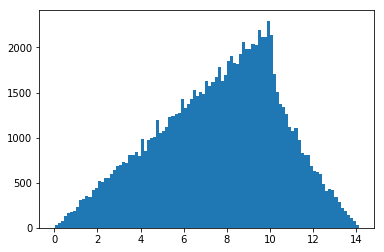

In [38]:
max_time = max(times)
min_time = min(times)
num_bins = 100
bins = np.linspace(min_time,max_time,num_bins)
plt.hist(times,bins=bins)
plt.show()

The density of beetles in world is given by the slope at the initially increasing part of the histogram.  This is the phase of the dynamics where beetles on a ring of ever increasing radius reach the light.  The peak is where the circle just inscribes into the square of our world.  After this the beetle numbers arriving rapidly drop off.

In [3]:
den = num_beetles/(20**2)

In [4]:
print(den)

250.0
